<a href="https://colab.research.google.com/github/Albina1810/ML-projects/blob/master/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2 BAX  443  

ALBINA JOLDASSOVA




#Question 1

##DATA INGEST 

In [0]:
## download libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
%matplotlib inline


In [0]:
## upload the data 


df= pd.read_csv('https://raw.githubusercontent.com/ormarketing/finance/master/datahomework2.csv')
df.head()

,Amazon,Apple,Ebay,Facebook,Google,Twitter
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999


In [0]:
##  
  
T = 250  ## 250 trading days in year when the Stock Exchange is open
m = 6   ## number of stocks 

##Exploratory Data Analysis 

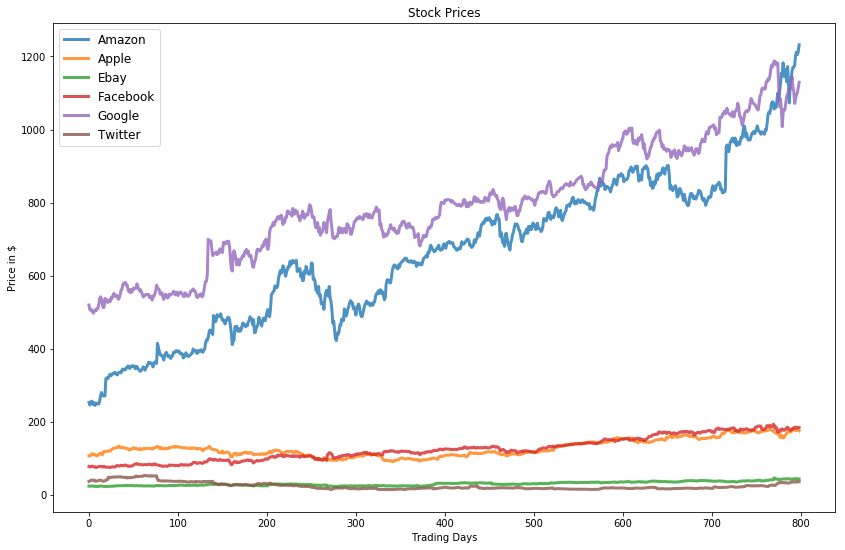

In [0]:
## Plot Stock Prices chart 

plt.figure(figsize=(14,9))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.title('Stock Prices')
plt.ylabel('Price in $')
plt.xlabel('Trading Days')
plt.show()

In [0]:
##Compute  daily returns of each stocks, 
## (closing Price for today - Closing Price for yesterday)/Closing Price for yesterday, in basis points
 
df['Amazon_rr'] = (df.Amazon-df.Amazon.shift(1))/df.Amazon.shift(1)
df['Apple_rr'] = (df.Apple-df.Apple.shift(1))/df.Apple.shift(1)
df['Ebay_rr'] = (df.Ebay-df.Ebay.shift(1))/df.Ebay.shift(1)
df['Facebook_rr'] = (df.Facebook-df.Facebook.shift(1))/df.Facebook.shift(1)
df['Google_rr'] = (df.Google-df.Google.shift(1))/df.Google.shift(1)
df['Twitter_rr'] = (df.Twitter-df.Twitter.shift(1))/df.Twitter.shift(1)
df.head(10)

,Amazon,Apple,Ebay,Facebook,Google,Twitter,Amazon_rr,Apple_rr,Ebay_rr,Facebook_rr,Google_rr,Twitter_rr
0,252.585,106.250000,23.457600,77.190002,519.500000,36.380001,NaN,NaN,NaN,NaN,NaN,NaN
1,245.488,106.260002,23.156700,76.150002,506.600006,37.279999,-0.028097,0.000094,-0.012827,-0.013473,-0.024832,0.024739
2,253.816,107.750000,23.116699,76.150002,505.200012,39.090000,0.033924,0.014022,-0.001727,0.000000,-0.002764,0.048552
3,256.030,111.889999,23.741699,78.175003,506.899994,40.169998,0.008723,0.038422,0.027037,0.026592,0.003365,0.027628
4,253.299,112.010002,23.413401,77.739998,500.700012,39.369999,-0.010667,0.001073,-0.013828,-0.005565,-0.012231,-0.019915
5,246.090,109.250000,23.232500,76.720001,497.100006,39.650002,-0.028460,-0.024641,-0.007726,-0.013121,-0.007190,0.007112
6,251.854,110.220001,23.202999,76.449997,501.799988,39.849998,0.023422,0.008879,-0.001270,-0.003519,0.009455,0.005044
7,244.645,109.800003,22.740000,76.279999,505.899994,36.930000,-0.028624,-0.003811,-0.019954,-0.002224,0.008171,-0.073275
8,250.526,106.820000,22.312799,74.050003,504.000000,37.310001,0.024039,-0.027140,-0.018786,-0.029234,-0.003756,0.010290
9,249.082,105.989998,22.584299,75.180000,510.500000,37.570000,-0.005764,-0.007770,0.012168,0.015260,0.012897,0.006969


In [0]:
df.shape

(799, 12)

In [0]:
##  create an array of columns of returns names 
c = ['Apple_rr','Ebay_rr','Facebook_rr', 'Google_rr','Twitter_rr']

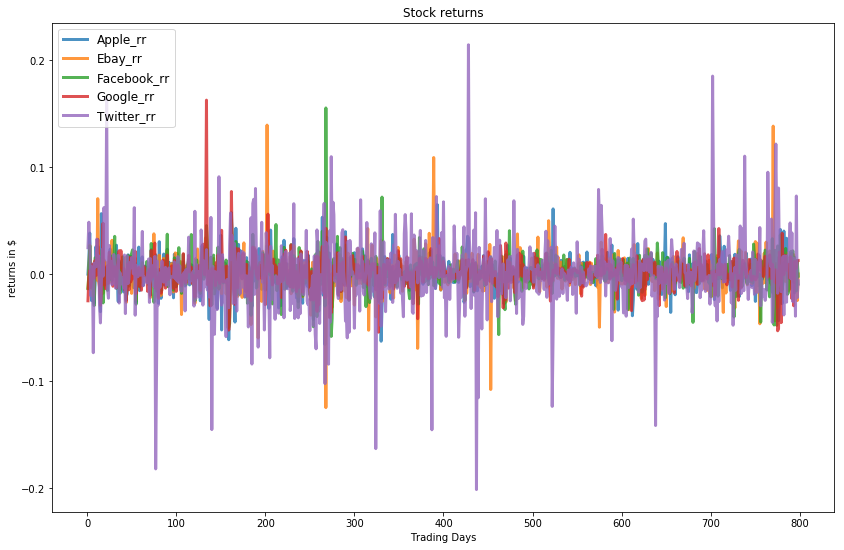

In [0]:
## Plot the chart of daily returns of each stocks to observe the daily volatility 

plt.figure(figsize=(14,9))
for c in c:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.title('Stock returns')
plt.ylabel('returns in $')
plt.xlabel('Trading Days')
plt.show()

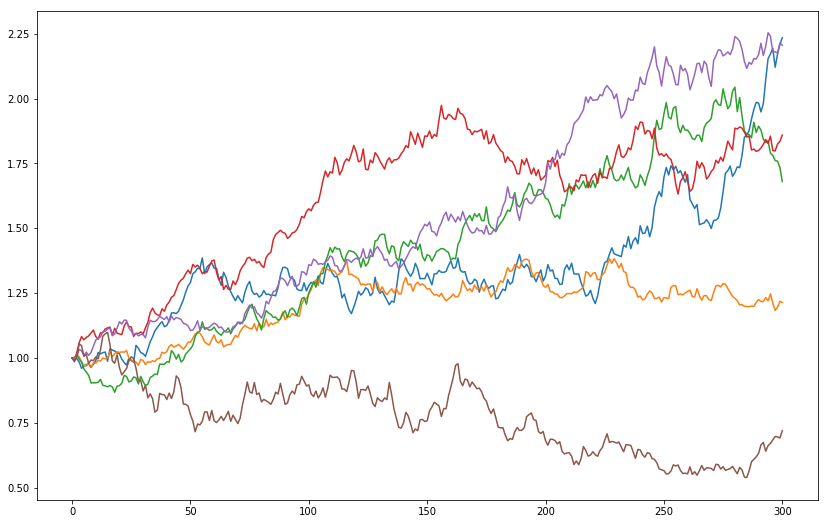

In [0]:
## return of each stock during period of T = 300 days
T = 300
y[0]=[1,1,1,1,1,1]
for i in range(T):
    rr=np.random.multivariate_normal(mu,Cov)
    y[i+1]=y[i]*(1+rr)
plt.figure(figsize=(14,9))
plt.plot(y)
plt.show()

##Q1.1.

In [0]:
## Assuming that the returns for the 6 stocks follow a multivariate Normal distribution, 
# i.e., N(mu,Σ). Compute/Estimate mu and Σ.



In [0]:
## Calculate Mu of stocks returns
from scipy import stats
mu = stats.gmean(1+df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']])-1
Cov = matrix((df.loc[1:,['Amazon_rr','Apple_rr','Ebay_rr','Facebook_rr','Google_rr','Twitter_rr']]).cov())
mu

array([ 1.98778605e-03,  6.25712686e-04,  7.54726158e-04,  1.08819147e-03,
        9.73603071e-04, -2.78636078e-05])

In [0]:
## variance covariance matrix
#Calculate Sigma of stocks returns 
Cov

matrix([[ 4.07197383e-04,  4.60871501e-06,  1.22772826e-05,
         -1.05667572e-05,  6.56723225e-06, -9.50143601e-05],
        [ 4.60871501e-06,  2.10803738e-04,  5.99369391e-05,
          6.94486102e-05,  6.00972702e-05,  4.03675884e-05],
        [ 1.22772826e-05,  5.99369391e-05,  2.92036867e-04,
          2.71083411e-05,  5.45848998e-05,  2.43589542e-05],
        [-1.05667572e-05,  6.94486102e-05,  2.71083411e-05,
          2.42364043e-04,  9.89613220e-05,  2.19275119e-05],
        [ 6.56723225e-06,  6.00972702e-05,  5.45848998e-05,
          9.89613220e-05,  2.02842223e-04,  9.65658927e-06],
        [-9.50143601e-05,  4.03675884e-05,  2.43589542e-05,
          2.19275119e-05,  9.65658927e-06,  1.07122641e-03]])

##Q1.2 Asset Allocation 

The goal is to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^5x_i&=1\\
x&\geq0
\end{align}


In [0]:
## return sould be no less than 7% a year, 
#we have to convert in daily returnas we are using daily rr

R=0.07/250

In [0]:
x=cvx.Variable(6)
#Cov=np.matrix(Cov)#I transform the estimated variance-covariance array as a matrix
risk=quad_form(x, Cov)
rr=sum(mu*x)
prob1 = Problem(Minimize(risk),
              [rr>=R,sum(x) == 1,
               x >= 0])
prob1.solve()
print(x.value)
print(prob1.solve())

    

[0.20424961 0.19549438 0.16169989 0.17375783 0.18985696 0.07494132]
7.834639688428536e-05


In [0]:
shares = [0.20424961, 0.19549438, 0.16169989, 0.17375783, 0.18985696, 0.07494132]
portfolio_rr = 7.834639688428536e-05

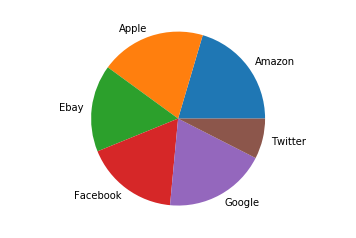

In [0]:
## See teh results of assets allocation
import pandas as pd
from matplotlib.pyplot import pie, axis, show

labels = ['Amazon', 'Apple', 'Ebay', 'Facebook', 'Google', 'Twitter']
axis('equal')
pie(shares, labels=labels)
show()


##Q1.3 Asset Allocation with  the risk aversion coefficient of the investor Gamma
Whatis theasset allocation  that solve the following optimization problem

Recall the problem is.

\begin{align}
\text{Maximize} \quad\mu^T x -\gamma sqrt (x^T & \Sigma x)\\
\sum_{i=1}^5x_i&=1\\
x&\geq0
\end{align}

In [0]:
import numpy as np
from scipy.optimize import minimize

#Gamma = 0.1


def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*math.sqrt((np.dot(np.dot(x.T,Cov),x)))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.1
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [0.29719758 0.15496617 0.16260851 0.19658741 0.18864034 0.        ]
The objective function value is
 0.0002612798577979901


     fun: -0.0002612798577979901
     jac: array([-6.89778048e-04,  1.00689867e-04,  4.85473574e-05, -2.60699533e-04,
       -1.51224151e-04, -9.77136297e-05])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.29719758, 0.15496617, 0.16260851, 0.19658741, 0.18864034,
       0.        ])

In [0]:
## gamma 0.15

# function to calculate the risk measure (riskm)
def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*math.sqrt((np.dot(np.dot(x.T,Cov),x)))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.15
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [0.28057582 0.16267888 0.16697802 0.19494544 0.18969873 0.00512311]
The objective function value is
 -0.00021881455152755226


     fun: 0.00021881455152755226
     jac: array([-1.28919710e-04,  5.10344311e-04,  4.93468237e-04,  1.80389412e-04,
        2.87937321e-04, -4.32774541e-05])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.28057582, 0.16267888, 0.16697802, 0.19494544, 0.18969873,
       0.00512311])

In [0]:
#GAMMA = 0.2
def utility(x):
      """This is the utility"""
      return -(np.dot(mu.T,x)-gamma*math.sqrt((np.dot(np.dot(x.T,Cov),x)))) 

#x_init = matrix([1/6,1/6,1/6,1/6,1/6,1/6]) # initialize the allocation vector
K=20
x=np.zeros(6)
x[0]=K/6
x[1]=K/6
x[2]=K/6
x[3]=K/6
x[4]=K/6
x[5]=K/6
gamma=0.2
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons=(cons1)
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
#sol = minimize(riskm,x,constraints=cons,bounds=bnds,method="BFGS", tol=1e-2)
sol = minimize(utility,x,constraints=(cons1),bounds=bnds, tol=1e-6)
print("The optimal allocation for each stock is\n",sol.x)
print("The objective function value is\n",-sol.fun)
sol

The optimal allocation for each stock is
 [0.25966616 0.1674105  0.16932836 0.19111177 0.18793245 0.02455077]
The objective function value is
 -0.0006836741545726973


     fun: 0.0006836741545726973
     jac: array([0.00032684, 0.00095868, 0.00097264, 0.00064398, 0.00074433,
       0.00043421])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.25966616, 0.1674105 , 0.16932836, 0.19111177, 0.18793245,
       0.02455077])

##Q1.4.  Simulation of Portfolio Performance
SimulationsBased on the optimal allocations obtained in the two questions above, please simulate the value of your portfolio after 300 trading daysassuming that you have invested $100,000. 

In [0]:
# Simulation 100 paths
import numpy as np
import matplotlib.pyplot as plt
simu=100 # I am doing 50 simulations
T = 300 # 250 trading days
m=6 # I have 5 assets
B=100000 # Budget is $100
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4), x.value.item(5)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(np.sum(y[T])*B)

np.mean(z_values)

134244.97478387348

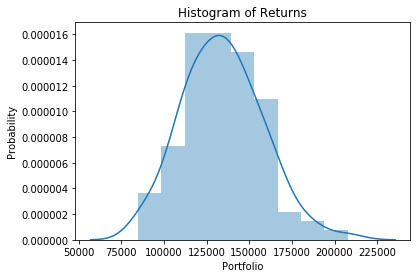

In [0]:

sns.distplot(z_values)
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

## mean is 134K


##    

#QUESTION 2

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import scipy
from math import *
from scipy import *
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from math import *


##Q2.1 
Suppose you can charge any prices you like, what prices should be charged in each market to maximize profit? What are the corresponding demands and profit contributions of each market?

In [0]:
#dw = 10000-800*pw  demand function for WC
#ds = 8000 - 500*ps  demand function for Sd

c = 5    ## costs 
def profit(p):
    profit1 = -((10000-800*p[0])*(p[0]-c) + (8000 - 500*p[1])*(p[1]-c))
    return profit1

sol2=minimize(profit, [5, 5], method="BFGS")
print(-sol2.fun)
print(sol2.x)
print(sol2)

## Answer: $8.75 for Walnat Creek and $10.5 for Scottsdale
## Profit is $26375

26374.999999999993
[ 8.75000008 10.50000004]
      fun: -26374.999999999993
 hess_inv: array([[6.25000032e-04, 4.37911959e-11],
       [4.37911959e-11, 9.99999983e-04]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 8.75000008, 10.50000004])


In [0]:
dw = 10000-800*8.75  ## demand for WC
ds = 8000-500*10.5   ## demand for Sd
 
cmw = 8.75 - 5       ## contribution margin for WC
cms= 10.5-5          ## contribition margin for Sd 

dw, ds, cmw, cms

## Demand for WC = 3000 pieces 
## Demand for Scottsdale = 2750 pieces 
## Contribution Margin for WC = $3.75
## Contribution Margin for Sd = $5.5

(3000.0, 2750.0, 3.75, 5.5)

##Q2.2

Smart Cookie discovers a way to transport cases from Walnut Creek to Scottsdale for $0.5 each. He then buys cases in Walnut Creek and shipsthem to Scottsdale to sell them.Assuming that you do not (or cannot) change yourprices from those given in question1, what will be the optimal price for Smart Cookie to sell cases in Scottsdale? How many will he sell? What will his total profit be? (Assume that Scottsdale customers will buy cases from the cheapest vendor). What will happen to your total sales and profit? (Remember that you are now selling to Smart Cookie, i.e., you cannot prevent him from buying from youin Walnut Creek).

In [0]:
c2 = 5 + 0.5   ## costs for Smart Cookie
#ds = 8000 - 500*psc

In [0]:
##set the bounds for SC prices as min = 5.5 and max = 10.49 ( 1 cent cheaper than from oficial seller)

import math
import numpy as np
from math import *
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
c=5.5 # Marginal Cost of Production

def profit(p):
    """This is the negative profit function"""
    return -((8000-500*p)*(p-5.5))
  
res = minimize_scalar(profit, bounds = (5.5, 10.3), method='bounded') # The routine is coded as mininization
print(-res.fun) # Return the profit level at the optimal price
print(res.x) # This is the optimal price


## He can make profit for 13747 selling iPhones for $10.49
## Or ( if 1 cent is not sensitive for a buyer) he can make 13720, selling iPhones for $10.40

13719.99758668243
10.399993104874852


In [0]:
## Demand of Smart Cokkie in Scottsdale for price $10.49
ds = 8000 - 500*10.49
ds  
## 2755

2755.0

In [0]:
## Profit of Smart Cookie for price $10.49
(8000 - 500*10.49)*(10.4-5.5)
## Profit is $13500

13499.500000000002

##Q2.3.
You wantthe eliminate the Smart Cookie’s arbitrage opportunity by ensuring that your price in Scottsdale is no more than $0.05 more than the selling price in Walnut Creek (and vice versa). What is your new selling price in each city? What are your corresponding sales and profit?

In [0]:
##1

#dw = 10000-800*pw
#ds = 8000 - 500*ps

c = 5
p = [5, 5]  ##initial prices 

def constraint1(p):
    return -(p[1]-p[0])+0.5
con1 = {'type':'ineq', 'fun': constraint1}
def profit4(p):
    profit = -((10000-800*p[0])*(p[0]-c) + (8000 - 500*p[1])*(p[1]-c))
    return profit


sol4=minimize(profit4, [5,5], constraints = con1)
print(-sol4.fun)
print(sol4.x)
print(sol4)

## price for WC = $9.23, price for Sd = $9.73. the difference is $0.5


25894.23077223322
[9.23076928 9.73076928]
     fun: -25894.23077223322
     jac: array([ 769.23071289, -769.23095703])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([9.23076928, 9.73076928])


In [0]:
## Demand for each city with the new prices (9.23, 9.73)
dw = 10000-800*9.23  ## demand for WC
ds = 8000-500*9.73  ## demand for Sd
dw, ds

# (2616.0, 3135.0) in pieces 

(2616.0, 3135.0)

In [0]:
## Sales for each city in $$

salesWC = 2616.0* 9.23
salesSd = 3135 * 9.75

salesWC, salesSd
  
## (24145.68, 30566.25) in dollars 

(24145.68, 30566.25)

In [0]:
## Profit for both cities 

((10000-800*9.23)*(9.23-5) + (8000 - 500*9.75)*(9.75-5))
##$$ 25909

25909.43

From this arbitrage risk, customers in Scottsdale win, and customers in Walnut Creek loose